In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diffuse_models = pd.read_excel("PerezModelOutput_Hamburg.xlsx")

In [3]:
diffuse_models.head(5)

,Date,GHS,DHI,Theta_z,DNI,Perez_Irradiance,Reindl_Irradiance,HayDavies_Irradiance
0,2020-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Analysis of the Correlation Between Three Different Models and DHI Values from DWD

The heatmap analysis indicates that the three models exhibit a high degree of correlation with each other, as well as with the DHI values from DWD. The differences between the models are minimal, suggesting that they all perform similarly in terms of their relationship with the DHI data. This strong correlation describes the reliability and consistency across the models in predicting or aligning with the DHI values.

In [4]:
all_diffuse = diffuse_models[['DHI','Perez_Irradiance','Reindl_Irradiance','HayDavies_Irradiance']]

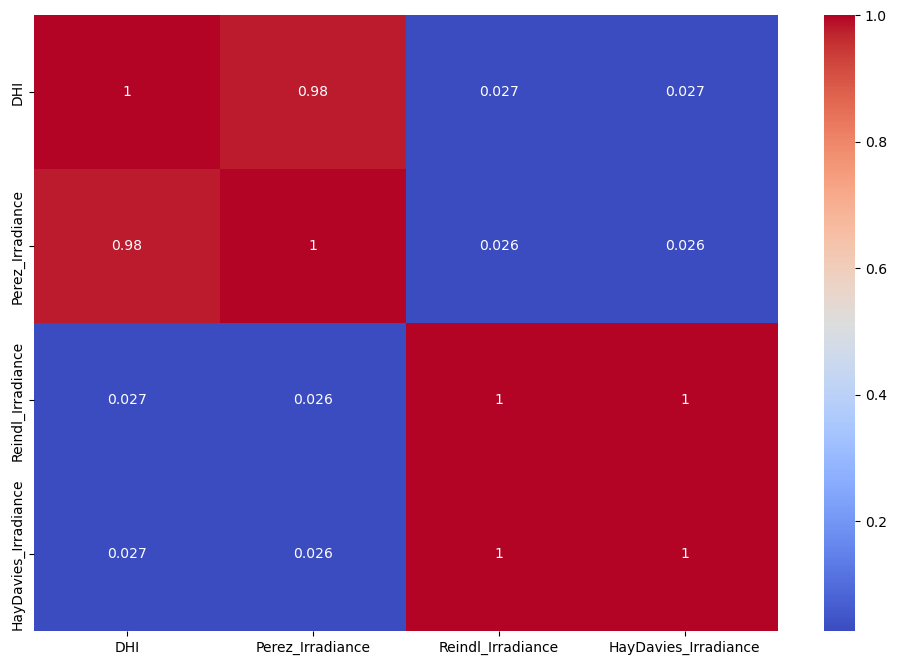

In [5]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Compute the correlation matrix for the encoded DataFrame
corr_matrix = all_diffuse.corr()

# Set the figure size (width, height)
plt.figure(figsize=(12, 8))  # Adjust the values (12, 8) as per your needs

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('Model correlation_HB.png')

# Show the plot
plt.show()

## Monthly Irradiance Analysis for 2020-2023

### Overview
This analysis visualizes the **Global Horizontal Solar (GHS)** and **Perez Irradiance** data for the years 2020, 2021, 2022, and 2023. The goal is to observe the trends and compare the maximum values of these two irradiance metrics across the months for each year.

### Data Breakdown
- **GHS**: Represents the Global Horizontal Solar irradiance, a measure of solar energy received by a horizontal surface.
- **Perez Irradiance**: Represents the Perez model-based estimation of solar irradiance, which takes into account the diffuse and direct solar radiation.

### Plot Description
The data is presented in a **2x2 grid** of subplots, where each subplot corresponds to a specific year (2020, 2021, 2022, and 2023). Each plot contains the following:

- **GHS Curve (Orange)**: This curve represents the monthly values of GHS for the given year.
- **Perez Irradiance Curve (Green)**: This curve represents the monthly values of Perez Irradiance for the given year.
- **Shaded Areas**: The shaded regions under both the GHS and Perez Irradiance curves show the range of values for each month, providing a visual indication of the variability in the data.
- **Monthly Maximums (Markers)**: The maximum values of GHS and Perez Irradiance for each month are plotted with markers (orange circles for GHS and green crosses for Perez Irradiance). These markers help highlight the peak irradiance levels each month.

### Insights
By observing the plots, one can draw conclusions about:
1. **Seasonal Trends**: We can see the seasonal fluctuations in solar irradiance for each year, with higher irradiance in the summer months and lower irradiance in the winter months.
2. **Comparison between GHS and Perez Irradiance**: The two curves (GHS and Perez Irradiance) allow for a comparison of the raw solar irradiance versus the model-based estimation, highlighting any discrepancies between the two metrics.
3. **Yearly Variations**: The maximum values of GHS and Perez Irradiance for each month may vary slightly from year to year, providing insights into annual changes in solar energy potential.

### Conclusion
This visualization helps us understand how solar irradiance values evolve throughout each year, with a particular focus on the peak values for GHS and Perez Irradiance. By examining these trends, we can derive actionable insights for optimizing solar energy generation and forecasting solar power potential based on historical data.


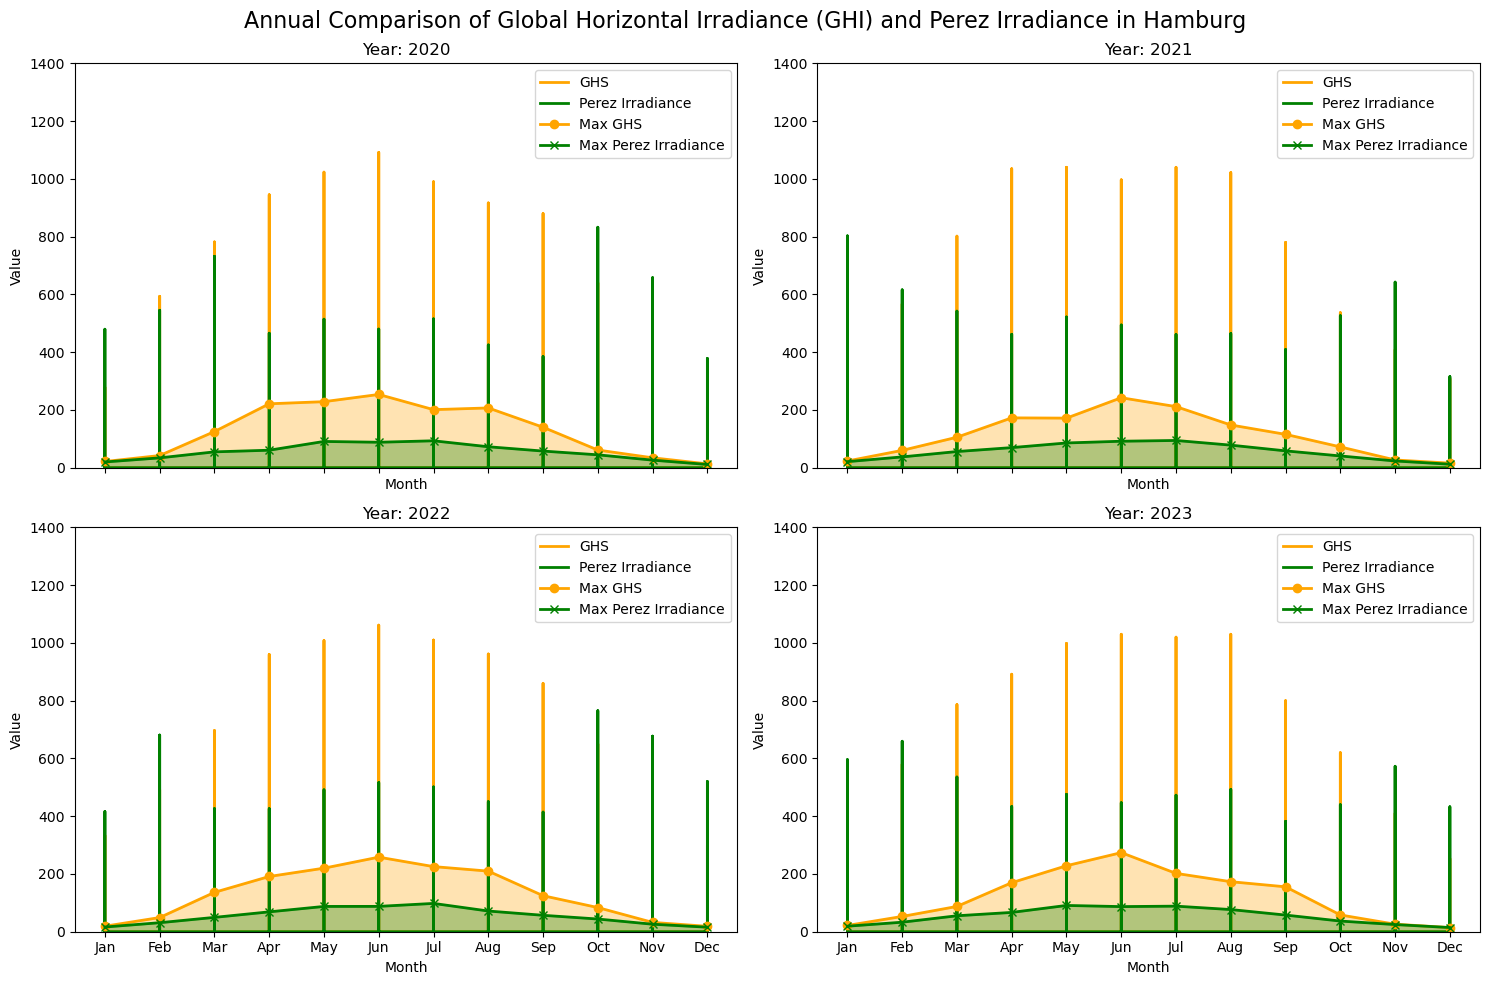

In [6]:

# Extract the month and year from the 'Date' column
diffuse_models['Month'] = diffuse_models['Date'].dt.month
diffuse_models['Year'] = diffuse_models['Date'].dt.year

# Set up the plot with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
fig.suptitle("Annual Comparison of Global Horizontal Irradiance (GHI) and Perez Irradiance in Hamburg", fontsize=16)

# Loop through each year and create subplots
for i, year in enumerate([2020, 2021, 2022, 2023]):
    ax = axes[i // 2, i % 2]  # Determine subplot position
    year_data = diffuse_models[diffuse_models['Year'] == year]
    
    # Plot the GHS and Perez Irradiance for the year
    ax.plot(year_data['Month'], year_data['GHS'], label='GHS', color='orange', linewidth=2)
    ax.plot(year_data['Month'], year_data['Perez_Irradiance'], label='Perez Irradiance', color='green', linestyle='-', linewidth=2)
    
    # Plot the curve connecting the maximum values for each month (calculated for each year)
    monthly_max = year_data.groupby('Month').agg({
        'GHS': 'mean',
        'Perez_Irradiance': 'mean'
    }).reset_index()
    
    # Shaded area beneath GHS curve
    ax.fill_between(monthly_max['Month'], monthly_max['GHS'], color='orange', alpha=0.3)
    
    # Shaded area beneath Perez Irradiance curve
    ax.fill_between(monthly_max['Month'], monthly_max['Perez_Irradiance'], color='green', alpha=0.3)
    
    ax.plot(monthly_max['Month'], monthly_max['GHS'], color='orange', marker='o', linestyle='-', linewidth=2, label='Max GHS')
    ax.plot(monthly_max['Month'], monthly_max['Perez_Irradiance'], color='green', marker='x', linestyle='-', linewidth=2, label='Max Perez Irradiance')

    
    # Customize the plot
    ax.set_title(f'Year: {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')
    ax.set_xticks(range(1, 13))  # Set X-axis labels for months
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.legend()

    # Set the Y-axis range from 0 to 1400 for both y-axes
    ax.set_ylim(0, 1400)

    plt.savefig('Monthly Irradiance Analysis for 2020-2023_HB.png')

# Step 4: Show the plot
plt.tight_layout()
plt.show()


### Stacked Bar Chart: Percentage of Solar Diffuse Radiation Composed of Global Solar Radiation (GHS) Using the Perez Model

This stacked bar chart illustrates the percentage of solar diffuse radiation incident on a panel, as calculated using the Perez model, that is contributed by Global Solar Radiation (GHS).

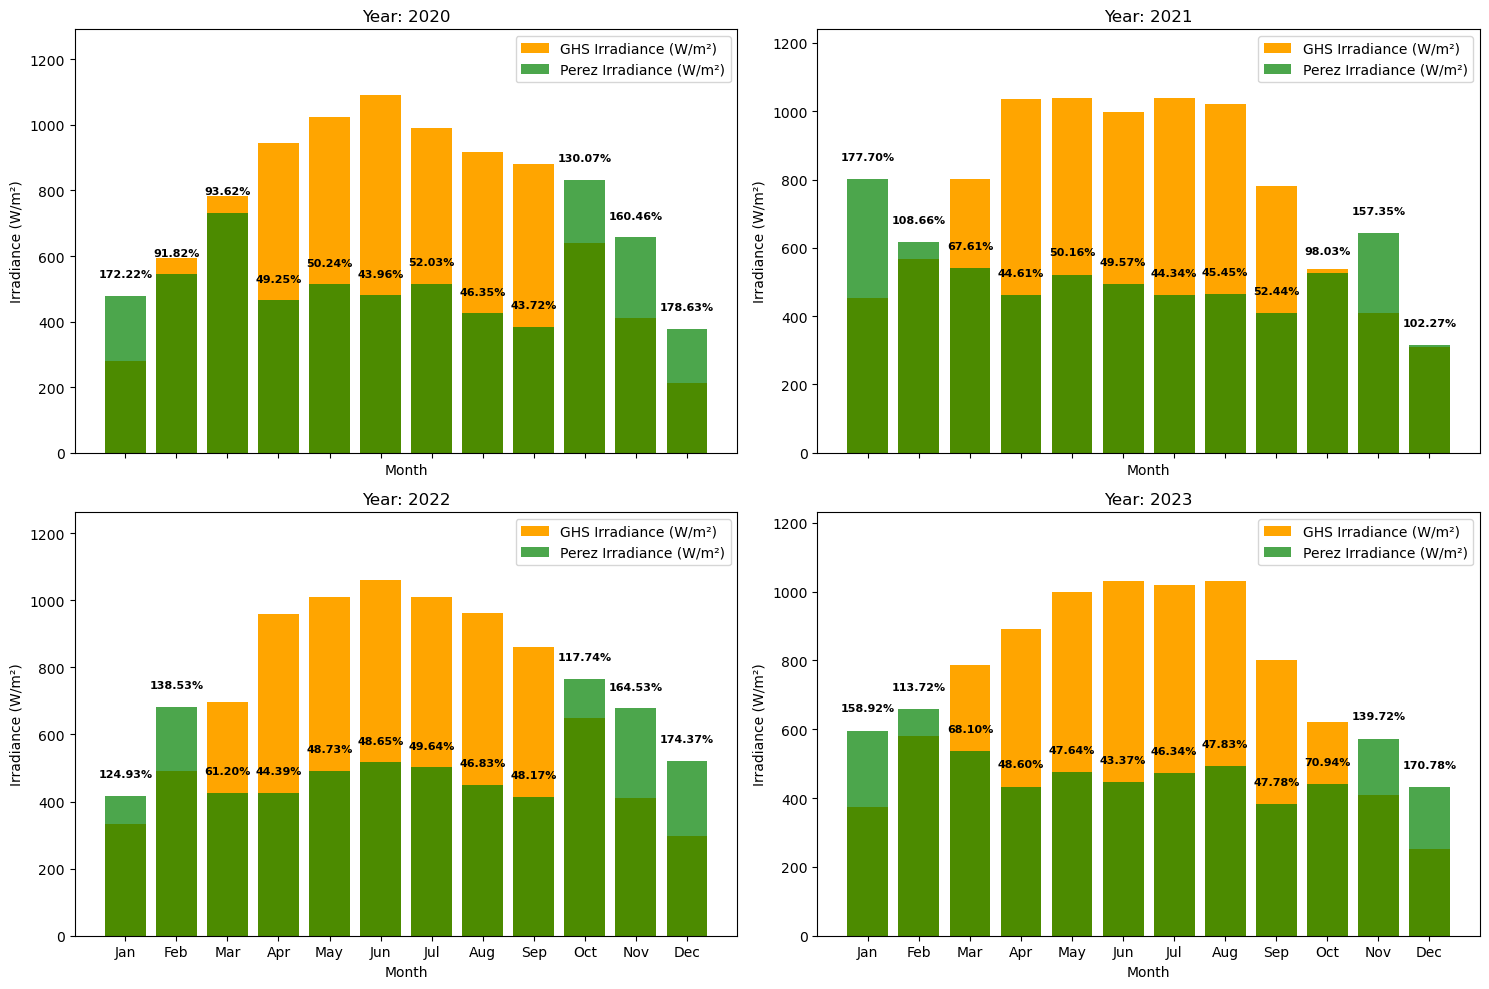

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Date' is in datetime format
diffuse_models['Date'] = pd.to_datetime(diffuse_models['Date'])

# Extract the month and year from the 'Date' column
diffuse_models['Month'] = diffuse_models['Date'].dt.month
diffuse_models['Year'] = diffuse_models['Date'].dt.year

# Set up the plot with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

# Loop through each year and create subplots
for i, year in enumerate([2020, 2021, 2022, 2023]):
    ax = axes[i // 2, i % 2]  # Determine subplot position
    year_data = diffuse_models[diffuse_models['Year'] == year]
    
    # Group by month and get max values for each month
    monthly_max = year_data.groupby('Month').agg({
        'GHS': 'max',  # Get max GHS for each month
        'Perez_Irradiance': 'max'  # Get max Perez Irradiance for each month
    }).reset_index()
    
    # Calculate the percentage of Perez Irradiance compared to GHS
    monthly_max['Perez_Percentage'] = (monthly_max['Perez_Irradiance'] / monthly_max['GHS']) * 100

    # Plot the bar chart: GHS vs Perez Irradiance
    ax.bar(monthly_max['Month'], monthly_max['GHS'], label='GHS Irradiance (W/m²)', color='orange')
    ax.bar(monthly_max['Month'], monthly_max['Perez_Irradiance'], label='Perez Irradiance (W/m²)', color='green', alpha=0.7)

    # Add the percentage value on top of the Perez Irradiance bars
    for j, month in enumerate(monthly_max['Month']):
        percentage_text = f"{monthly_max['Perez_Percentage'].iloc[j]:.2f}%"
        ax.text(month, monthly_max['Perez_Irradiance'].iloc[j] + 50, percentage_text, ha='center', va='bottom', fontsize=8,fontweight = 'bold')

    # Customize the plot
    ax.set_title(f'Year: {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Irradiance (W/m²)')
    ax.set_xticks(range(1, 13))  # Set X-axis labels for months
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.legend()

    # Set the Y-axis range from 0 to the max value of GHS (adjust according to your data)
    ax.set_ylim(0, monthly_max['GHS'].max() + 200)  # Adjust the upper limit for better visualization

    plt.savefig('stacked_barcharts for 4 years_HB.png')
# Step 4: Show the plot
plt.tight_layout()
plt.show()


### Stacked Bar Chart: Percentage of Solar Diffuse Radiation Composed of Global Solar Radiation (GHS) Using the Perez Model

This stacked bar chart illustrates the percentage of solar diffuse radiation incident on a panel, as calculated using the Perez model, that is contributed by Global Solar Radiation (GHS).


In [8]:
 monthly_max = year_data.groupby('Month').agg({
        'GHS': 'max',
        'Perez_Irradiance': 'max'
    }).reset_index()
monthly_max

,Month,GHS,Perez_Irradiance
0,1,375.000000,595.937200
1,2,580.000000,659.548783
2,3,786.666667,535.697968
3,4,891.666667,433.365384
4,5,998.333333,475.653704
5,6,1030.000000,446.719341
6,7,1020.000000,472.675366
7,8,1030.000000,492.649381
8,9,800.000000,382.254195
9,10,620.000000,439.803612


In [9]:
 monthly_mean = year_data.groupby('Month').agg({
        'GHS': 'mean',
        'Perez_Irradiance': 'mean'
    }).reset_index()
monthly_mean

,Month,GHS,Perez_Irradiance
0,1,21.776434,19.133838
1,2,52.907573,32.978342
2,3,87.543309,55.223511
3,4,169.742284,66.877358
4,5,228.506944,90.986574
5,6,273.869599,86.985507
6,7,202.012395,88.565440
7,8,173.223193,76.747300
8,9,155.494599,57.691867
9,10,58.084304,36.951417


In [10]:

#  Extract year and month from the 'Date' column if not already done
diffuse_models['Year'] = diffuse_models['Date'].dt.year
diffuse_models['Month'] = diffuse_models['Date'].dt.month

#  Group by 'Year' and 'Month' and calculate the average of Perez_Irradiance for each month
monthly_avg = diffuse_models.groupby(['Year', 'Month'])['Perez_Irradiance'].mean().reset_index()

#  Find the month with maximum average Perez Irradiance for each year
max_months = monthly_avg.groupby('Year')['Perez_Irradiance'].idxmax()

# Find the month with minimum average Perez Irradiance for each year
min_months = monthly_avg.groupby('Year')['Perez_Irradiance'].idxmin()

#  Extract the corresponding rows for max and min months
max_months_data = monthly_avg.loc[max_months, ['Year', 'Month', 'Perez_Irradiance']]
min_months_data = monthly_avg.loc[min_months, ['Year', 'Month', 'Perez_Irradiance']]

# Step 6: Display the results
print("Month with Maximum Average Perez Irradiance for each year:")
print(max_months_data)

print("\nMonth with Minimum Average Perez Irradiance for each year:")
print(min_months_data)


Month with Maximum Average Perez Irradiance for each year:
    Year  Month  Perez_Irradiance
6   2020      7         93.002707
18  2021      7         94.149952
30  2022      7         98.037780
40  2023      5         90.986574

Month with Minimum Average Perez Irradiance for each year:
    Year  Month  Perez_Irradiance
11  2020     12         10.953544
23  2021     12         11.945642
35  2022     12         15.677380
47  2023     12         14.418379


In [11]:
monthly_avg

,Year,Month,Perez_Irradiance
0,2020,1,19.673465
1,2020,2,33.886149
2,2020,3,54.700848
3,2020,4,60.397671
4,2020,5,90.745853
5,2020,6,87.962701
6,2020,7,93.002707
7,2020,8,72.377806
8,2020,9,57.444054
9,2020,10,44.439145


## Comparison of Solar Diffuse Radiation Using the Perez Model

The bar charts illustrate the comparison of solar diffuse radiation on a panel based on the Perez model. 

From the analysis, it is observed that in 2020, December recorded the lowest diffuse radiation, while May experienced the highest levels. 

This pattern of varying radiation is consistently reflected in the remaining graphs, with similar trends observed across other months and years.

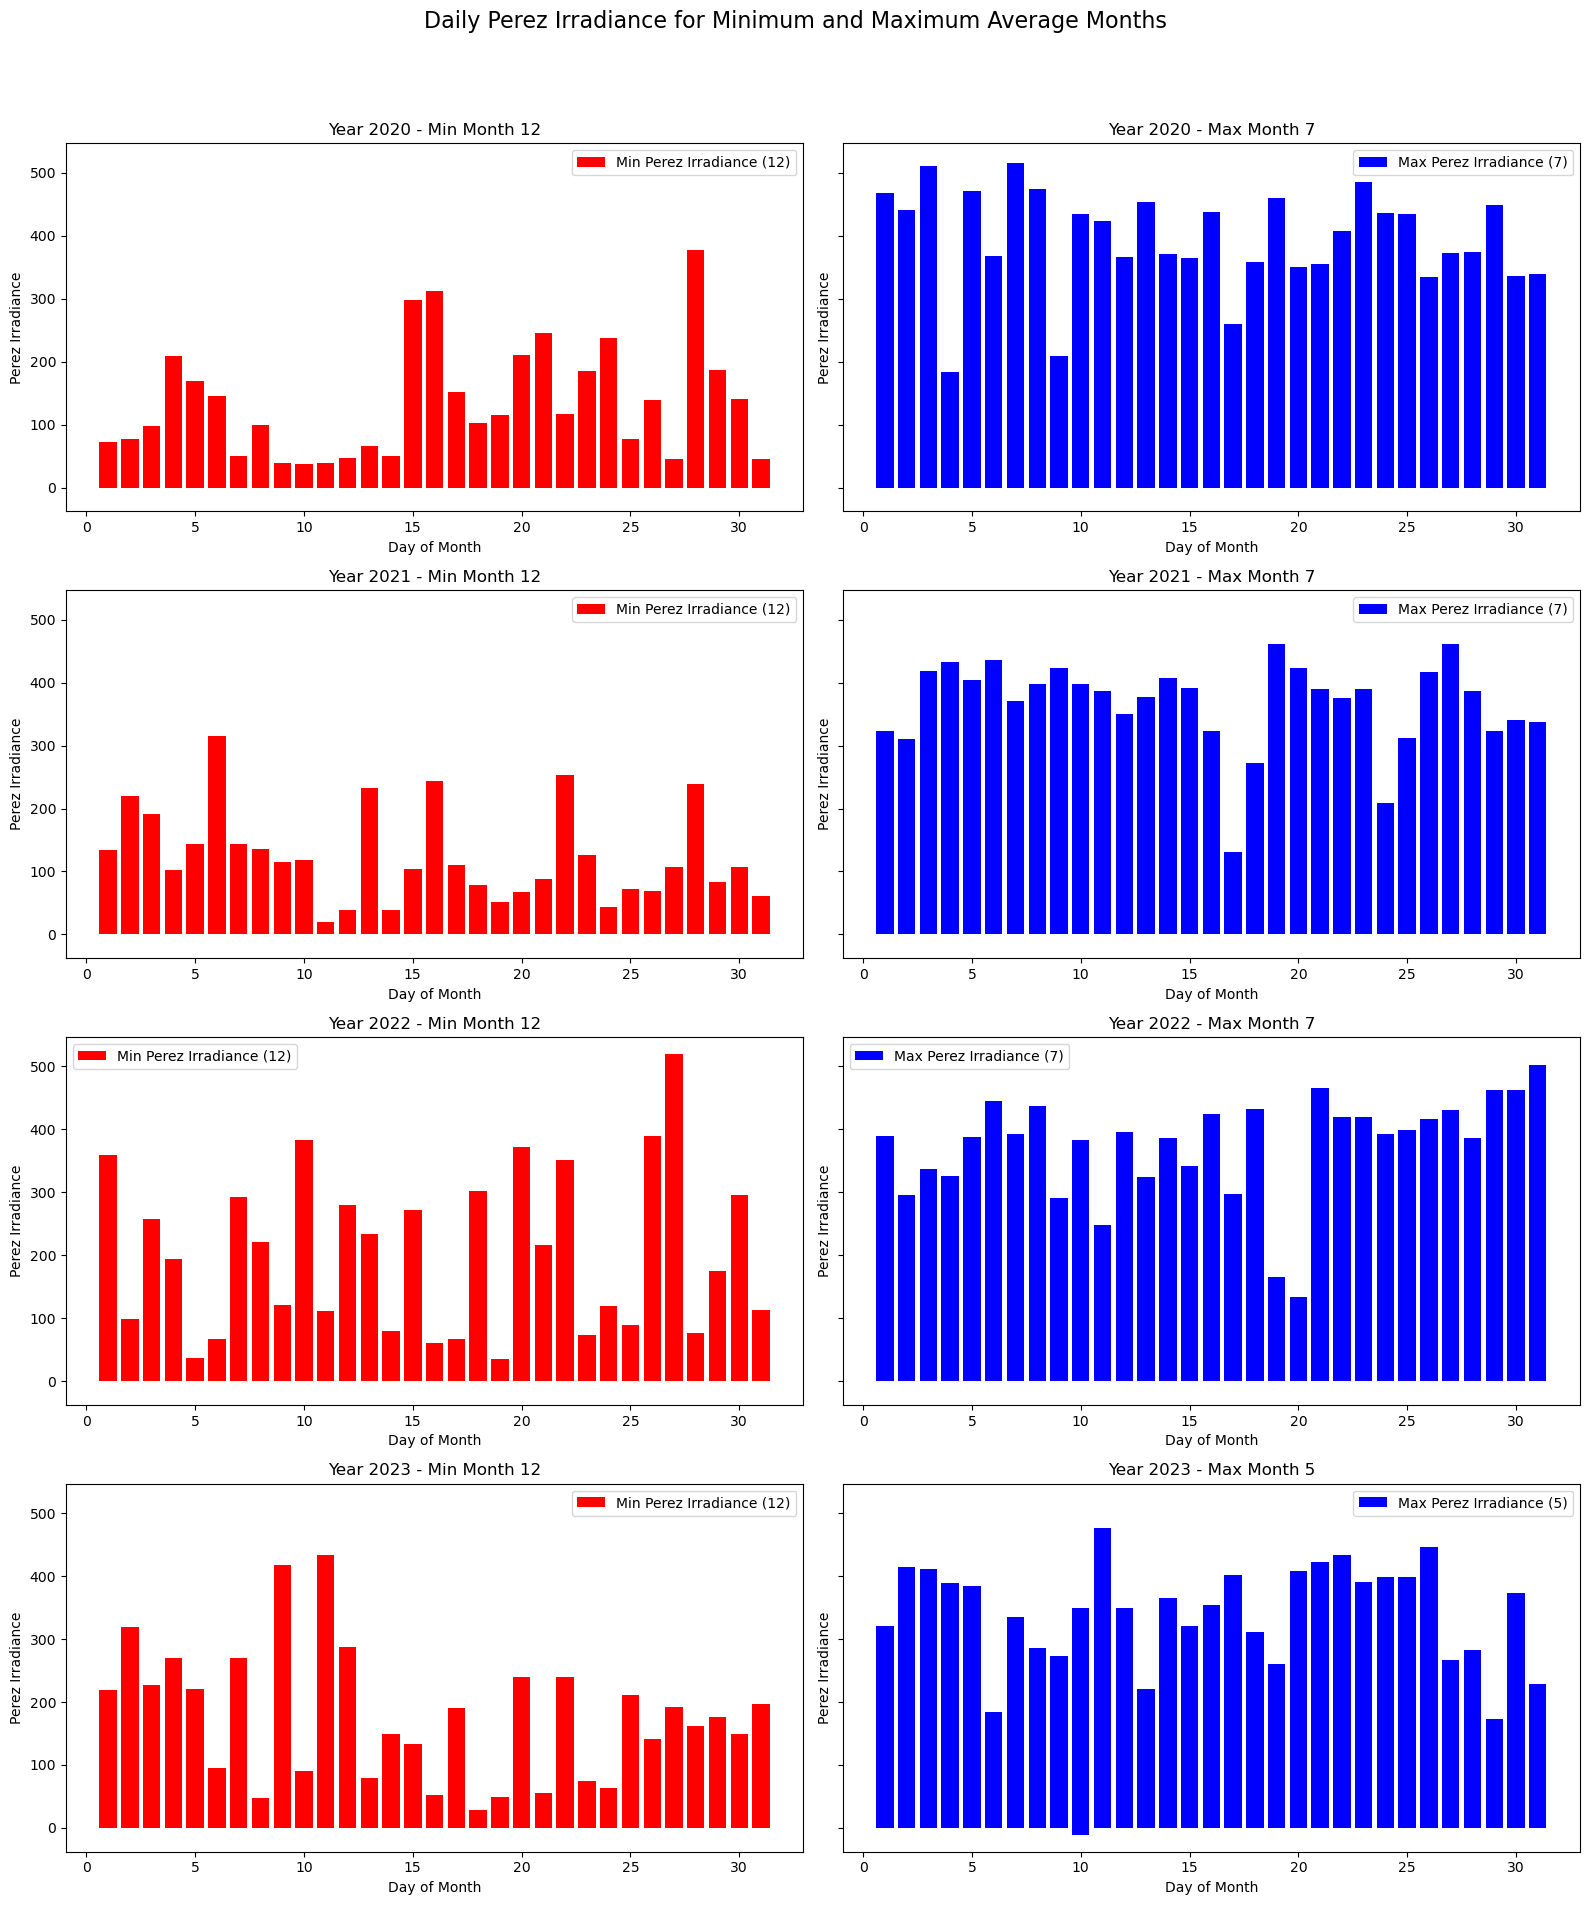

In [12]:

# Convert 'Date' to datetime if not already
diffuse_models['Date'] = pd.to_datetime(diffuse_models['Date'])
diffuse_models['Year'] = diffuse_models['Date'].dt.year
diffuse_models['Month'] = diffuse_models['Date'].dt.month
diffuse_models['Day'] = diffuse_models['Date'].dt.day

# Data for maximum and minimum average Perez_Irradiance
max_months = [
    (2020, 7),
    (2021, 7),
    (2022, 7),
    (2023, 5),
]
min_months = [
    (2020, 12),
    (2021, 12),
    (2022, 12),
    (2023, 12),
]

# Combine min and max months for sequential plotting
all_months = [(min_months[i], max_months[i]) for i in range(len(min_months))]

# Prepare the plot
fig, axes = plt.subplots(4, 2, figsize=(16, 20), sharey=True)
fig.suptitle("Daily Perez Irradiance for Minimum and Maximum Average Months", fontsize=16)

# Plotting each year's minimum and maximum data
for i, ((min_year, min_month), (max_year, max_month)) in enumerate(all_months):
    # Plot minimum for the year
    ax_min = axes[i, 0]
    min_data = diffuse_models[(diffuse_models['Year'] == min_year) & (diffuse_models['Month'] == min_month)]
    ax_min.bar(min_data['Day'], min_data['Perez_Irradiance'], color='red', label=f'Min Perez Irradiance ({min_month})')
    ax_min.set_title(f"Year {min_year} - Min Month {min_month}")
    ax_min.set_xlabel("Day of Month")
    ax_min.set_ylabel("Perez Irradiance")
    ax_min.legend()

    # Plot maximum for the year
    ax_max = axes[i, 1]
    max_data = diffuse_models[(diffuse_models['Year'] == max_year) & (diffuse_models['Month'] == max_month)]
    ax_max.bar(max_data['Day'], max_data['Perez_Irradiance'], color='blue', label=f'Max Perez Irradiance ({max_month})')
    ax_max.set_title(f"Year {max_year} - Max Month {max_month}")
    ax_max.set_xlabel("Day of Month")
    ax_max.set_ylabel("Perez Irradiance")
    ax_max.legend()
    
    plt.savefig('max_min_barcharts.png')
# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


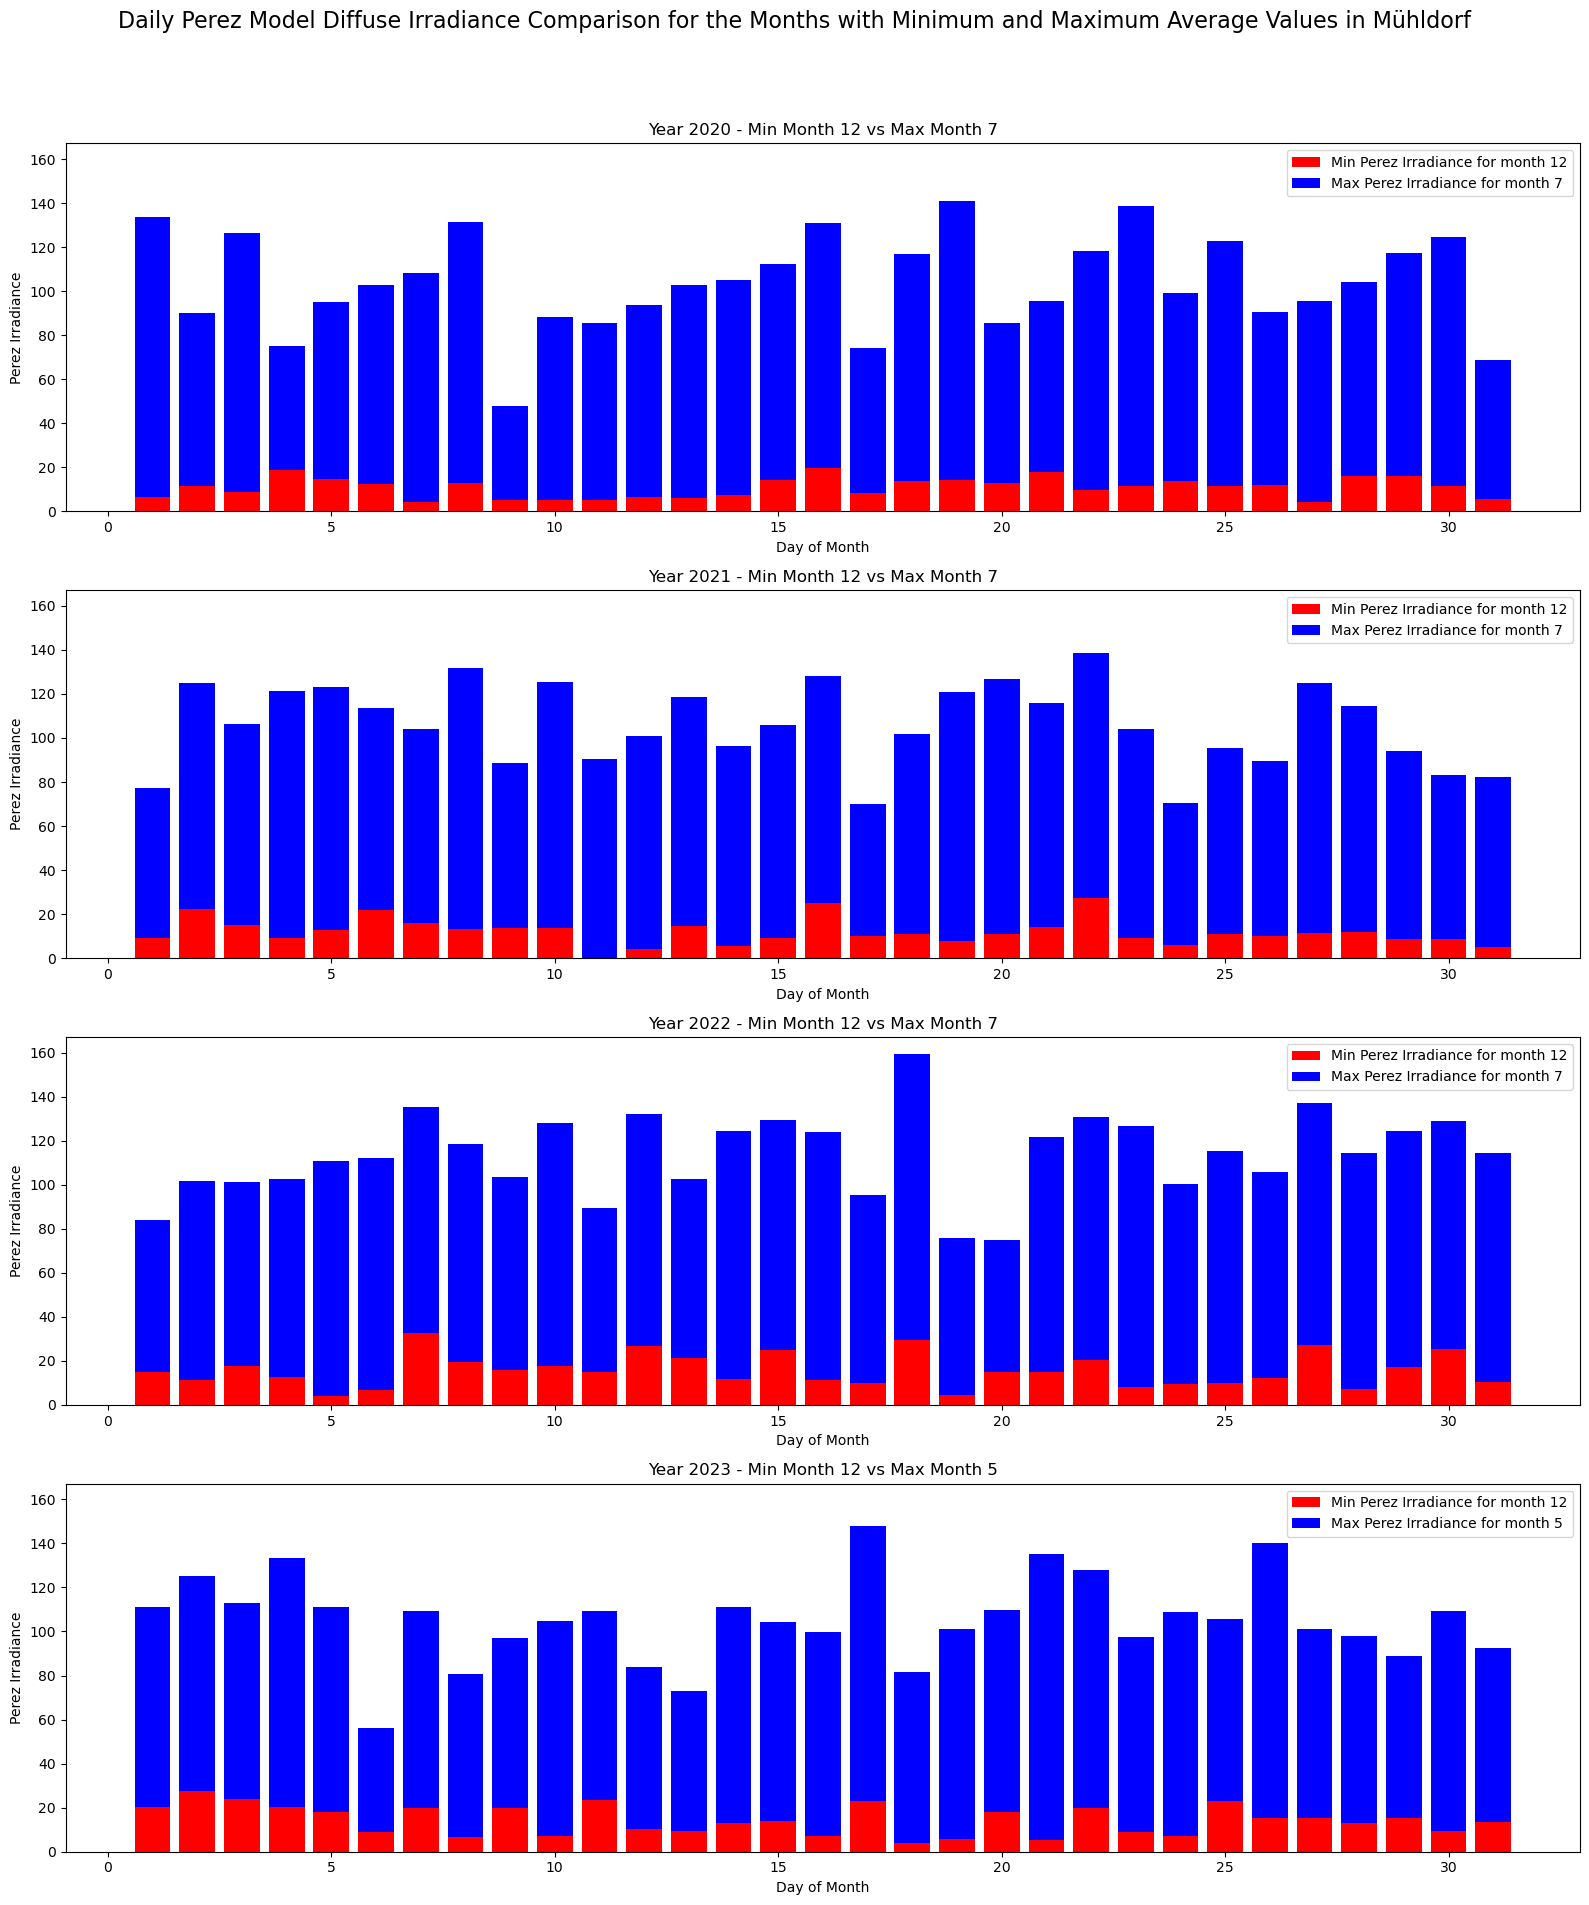

In [13]:

# Convert 'Date' to datetime if not already
diffuse_models['Date'] = pd.to_datetime(diffuse_models['Date'])
diffuse_models['Year'] = diffuse_models['Date'].dt.year
diffuse_models['Month'] = diffuse_models['Date'].dt.month
diffuse_models['Day'] = diffuse_models['Date'].dt.day

# Data for maximum and minimum average Perez_Irradiance
max_months = [
    (2020, 7),
    (2021, 7),
    (2022, 7),
    (2023, 5),
]
min_months = [
    (2020, 12),
    (2021, 12),
    (2022, 12),
    (2023, 12),
]

# Combine min and max months for sequential plotting
all_months = [(min_months[i], max_months[i]) for i in range(len(min_months))]

# Prepare the plot
fig, axes = plt.subplots(4, 1, figsize=(16, 20), sharey=True)  # 4 subplots instead of 8
fig.suptitle("Daily Perez Model Diffuse Irradiance Comparison for the Months with Minimum and Maximum Average Values in Mühldorf", fontsize=16)

# Plotting each year's minimum and maximum data
for i, ((min_year, min_month), (max_year, max_month)) in enumerate(all_months):
    # Prepare data for minimum and maximum irradiance for the given months
    min_data = diffuse_models[(diffuse_models['Year'] == min_year) & (diffuse_models['Month'] == min_month)]
    max_data = diffuse_models[(diffuse_models['Year'] == max_year) & (diffuse_models['Month'] == max_month)]
    
    # Group by 'Day' and calculate the sum (or mean) of 'Perez_Irradiance' for each day to handle duplicates
    min_data = min_data.groupby('Day')['Perez_Irradiance'].mean().reset_index()
    max_data = max_data.groupby('Day')['Perez_Irradiance'].mean().reset_index()
    
    # Align both datasets to the same days
    all_days = sorted(set(min_data['Day']).union(set(max_data['Day'])))
    
    # Reindex and fill missing days with zero for both datasets
    min_data = min_data.set_index('Day').reindex(all_days, fill_value=0)
    max_data = max_data.set_index('Day').reindex(all_days, fill_value=0)
    
    # Create the stacked bar chart
    ax = axes[i]
    ax.bar(min_data.index, min_data['Perez_Irradiance'], color='red', label=f'Min Perez Irradiance for month {min_month}')
    ax.bar(max_data.index, max_data['Perez_Irradiance'], color='blue', bottom=min_data['Perez_Irradiance'], label=f'Max Perez Irradiance for month {max_month}')
    
    # Customize the plot
    ax.set_title(f"Year {min_year} - Min Month {min_month} vs Max Month {max_month}")
    ax.set_xlabel("Day of Month")
    ax.set_ylabel("Perez Irradiance")
    ax.legend()

    plt.savefig('max_min_stacked_barcharts_HB.png')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
